# 📊 Projeto de Métricas Globais da ONU 2025
O projeto tem como objetivo :  Analisar os dados das Métricas dos países da ONU em 2025, focando nos indicadores como:
 - Produto Interno Bruto per capita(PIB per capita)
 -índice de desenvolvimento humano(IDH)
 -População e a área dos países.

A análise tem como objetivo :

- Gerar insights(informações relevantes) sobre a economia e desenvolvimento humano dos países, que busca partindo desse ponto, compreender a desiguldade social e padrões mundiais.

📚 Tecnologias e Bibliotecas

- Python

- Pandas

- Matplotlib

- Seaborn

- plotly

- numpy



🔎 Estatísticas Descritivas e Análise Estatística

- Foi feita a limpeza e padronização dos dados para garantir a qualidade da análise.

- Calculamos estatísticas descritivas como média, mediana, desvio padrão, mínimos e máximos dos principais indicadores.

- Realizamos análise de correlação entre variáveis econômicas e sociais para identificar relações importantes, como entre PIB per capita e IDH.

📈 Visualizações
O projeto contém os seguintes gráficos:

- Histograma da distribuição do PIB per capita
- Scatter plot da relação entre PIB per capita e IDH
- Boxplot do índice GINI para análise de desigualdade
- Scatter plot entre área e população dos países
- Esses gráficos ajudam a entender a dispersão dos dados e a relação entre as variáveis analisadas.

In [ ]:
# Importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
# Carregando dados
df  = pd.read_csv('/content/countries_metric - Sheet1.csv')
df.head()

,country_name,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
0,Afghanistan,"41,454,761",$17.329 billion,411,"2,174",0.50,35.20,"652,867"
1,Albania,"2,402,113",$28.372 billion,"10,526","23,404",0.81,33.00,"28,748"
2,Algeria,"46,700,000",$266.78 billion,"5,722","16,483",0.76,27.60,"2,381,741"
3,Andorra,"87,486",$3.897 billion,"44,900","69,146",0.91,40.00,467.63
4,Angola,"39,040,039",$93.796 billion,"2,432",7077,0.62,51.30,"1,246,700"


In [ ]:
# Explorar os dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country_name                             194 non-null    object 
 1   Population (in millions)                 194 non-null    object 
 2   Nominal Gross Domestic Product (in USD)  194 non-null    object 
 3   Nominal GDP Per capita (in USD)          194 non-null    object 
 4   GDP Per capita PPP (in USD)              194 non-null    object 
 5   Human Development Index (HDI)            192 non-null    float64
 6   GINI                                     174 non-null    float64
 7   AREA (in Sq km)                          194 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.3+ KB


In [ ]:
# Explorar os dados

df.describe()

,Human Development Index (HDI),GINI
count,192.00,174.00
mean,0.74,36.45
std,0.16,7.88
min,0.00,16.60
25%,0.62,30.71
50%,0.76,35.35
75%,0.86,40.98
max,0.97,63.00


In [ ]:
# Renomear colunas
df.rename(columns={
    'country_name': 'País',
    'Population (in millions)': 'População(milhões)',
    'Nominal Gross Domestic Product (in USD)': 'PIB_Total_Nominal(Bilhões)',
    'Nominal GDP Per capita (in USD)': 'PIB_per_capita_nominal',
    'GDP Per capita PPP (in USD)': 'PIB_per_capita',
    'Human Development Index (HDI)': 'IDH',
    'GINI': 'Desigualdade',
    'AREA (in Sq km)': 'Área_km2'
}, inplace=True)


In [ ]:
# Retirando coluna
df = df.drop(columns= 'PIB_per_capita_nominal')

In [ ]:
# Analisar as colunas
df.columns

Index(['País', 'População(milhões)', 'PIB_Total_Nominal(Bilhões)',
       'PIB_per_capita', 'IDH', 'Desigualdade', 'Área_km2'],
      dtype='object')

In [ ]:
# Analisar o tipo do dado
df.dtypes

,0
País,object
População(milhões),object
PIB_Total_Nominal(Bilhões),object
PIB_per_capita,object
IDH,float64
Desigualdade,float64
Área_km2,object


In [ ]:


# Função para limpar valores numéricos em texto
def limpar_coluna_numerica(coluna):
    return (
        coluna.astype(str)
        .str.lower()
        .str.replace(r'[^\d.,-]', '', regex=True)   # remove letras e símbolos
        .str.replace(',', '', regex=False)          # tira vírgula dos milhares
        .replace('', np.nan)                        # string vazia vira NaN
        .pipe(pd.to_numeric, errors='coerce')       # converte pra float
    )

# Lista das colunas que você quer limpar
colunas_para_limpar = [
    'População(milhões)',
    'PIB_Total_Nominal(Bilhões)',
    'PIB_per_capita',
    'IDH',
    'Desigualdade',
    'Área_km2'
]

# Aplica a limpeza
for col in colunas_para_limpar:
    df[col] = limpar_coluna_numerica(df[col])






In [ ]:
df

,País,População(milhões),PIB_Total_Nominal(Bilhões),PIB_per_capita,IDH,Desigualdade,Área_km2
0,Afghanistan,41454761,17.33,"2,174.00",0.50,35.20,"652,867.00"
1,Albania,2402113,28.37,"23,404.00",0.81,33.00,"28,748.00"
2,Algeria,46700000,266.78,"16,483.00",0.76,27.60,"2,381,741.00"
3,Andorra,87486,3.90,"69,146.00",0.91,40.00,467.63
4,Angola,39040039,93.80,"7,077.00",0.62,51.30,"1,246,700.00"
...,...,...,...,...,...,...,...
189,Venezuela,30518260,92.21,"7,985.00",0.71,44.80,"916,445.00"
190,Vietnam,100300000,465.81,"15,470.00",0.77,36.10,"331,344.82"
191,Yemen,41385529,21.05,"2,053.00",0.47,36.70,"455,503.00"
192,Zambia,20216029,29.54,"4,068.00",0.59,51.50,"752,617.00"


In [ ]:
# Ajustar População para milhões
if df['População(milhões)'].max() > 1000:
    df['População(milhões)'] = df['População(milhões)'] / 1_000_000


In [ ]:
df

,País,População(milhões),PIB_Total_Nominal(Bilhões),PIB_per_capita,IDH,Desigualdade,Área_km2
0,Afghanistan,41.45,17.33,"2,174.00",0.50,35.20,"652,867.00"
1,Albania,2.40,28.37,"23,404.00",0.81,33.00,"28,748.00"
2,Algeria,46.70,266.78,"16,483.00",0.76,27.60,"2,381,741.00"
3,Andorra,0.09,3.90,"69,146.00",0.91,40.00,467.63
4,Angola,39.04,93.80,"7,077.00",0.62,51.30,"1,246,700.00"
...,...,...,...,...,...,...,...
189,Venezuela,30.52,92.21,"7,985.00",0.71,44.80,"916,445.00"
190,Vietnam,100.30,465.81,"15,470.00",0.77,36.10,"331,344.82"
191,Yemen,41.39,21.05,"2,053.00",0.47,36.70,"455,503.00"
192,Zambia,20.22,29.54,"4,068.00",0.59,51.50,"752,617.00"


In [ ]:
# Caulcular densidade populacional
df['Densidade'] = (df['População(milhões)'] * 1_000_000) / df['Área_km2']
df

,País,População(milhões),PIB_Total_Nominal(Bilhões),PIB_per_capita,IDH,Desigualdade,Área_km2,Densidade
0,Afghanistan,41.45,17.33,"2,174.00",0.50,35.20,"652,867.00",63.50
1,Albania,2.40,28.37,"23,404.00",0.81,33.00,"28,748.00",83.56
2,Algeria,46.70,266.78,"16,483.00",0.76,27.60,"2,381,741.00",19.61
3,Andorra,0.09,3.90,"69,146.00",0.91,40.00,467.63,187.08
4,Angola,39.04,93.80,"7,077.00",0.62,51.30,"1,246,700.00",31.31
...,...,...,...,...,...,...,...,...
189,Venezuela,30.52,92.21,"7,985.00",0.71,44.80,"916,445.00",33.30
190,Vietnam,100.30,465.81,"15,470.00",0.77,36.10,"331,344.82",302.71
191,Yemen,41.39,21.05,"2,053.00",0.47,36.70,"455,503.00",90.86
192,Zambia,20.22,29.54,"4,068.00",0.59,51.50,"752,617.00",26.86


In [ ]:
# Estatísticas Gerais
pd.options.display.float_format = '{:,.2f}'.format
estatisticas = df.describe()
print(estatisticas.T[['mean', '50%', 'std', 'min', 'max']])

                                 mean        50%          std    min  \
População(milhões)              40.11       9.08       148.65   0.00   
PIB_Total_Nominal(Bilhões)     131.13      31.42       199.22   1.00   
PIB_per_capita              29,442.83  18,713.50    30,740.45 934.00   
IDH                              0.74       0.76         0.16   0.00   
Desigualdade                    36.45      35.35         7.88  16.60   
Área_km2                   658,764.56 120,269.00 1,818,097.43   0.49   
Densidade                      308.86      86.52     1,459.88   1.00   

                                     max  
População(milhões)              1,428.63  
PIB_Total_Nominal(Bilhões)        979.96  
PIB_per_capita                156,755.00  
IDH                                 0.97  
Desigualdade                       63.00  
Área_km2                   17,098,246.00  
Densidade                      18,472.60  


In [ ]:
# Trazendo os 20 paises mais populosos
top_20_paises = df.sort_values(by='População(milhões)', ascending=False).head(20)
top_20_paises

,País,População(milhões),PIB_Total_Nominal(Bilhões),PIB_per_capita,IDH,Desigualdade,Área_km2,Densidade
75,India,"1,428.63",4.19,"12,132.00",0.69,32.80,"3,287,263.00",434.59
35,China,"1,408.28",19.23,"28,978.00",0.80,35.70,"9,596,961.00",146.74
184,United States,340.11,30.51,"89,105.00",0.94,41.60,"3,796,742.00",89.58
76,Indonesia,284.97,1.43,"17,612.00",0.73,37.90,"1,904,569.00",149.63
129,Pakistan,241.50,374.60,"6,715.00",0.54,29.60,"881,913.00",273.84
23,Brazil,212.58,2.13,"23,238.00",0.79,51.60,"8,515,767.00",24.96
13,Bangladesh,171.47,467.22,"2,690.00",0.69,33.40,"148,460.00","1,154.97"
141,Russia,146.03,2.08,"49,383.00",0.83,36.00,"17,098,246.00",8.54
108,Mexico,131.95,1.69,"25,463.00",0.79,40.20,"1,972,550.00",66.89
83,Japan,123.40,4.19,"54,677.00",0.93,33.40,"377,975.00",326.48


In [ ]:
# Histograma PiB per capita

fig = px.histogram(df, x='PIB_per_capita', nbins=14, title='Histograma PIB per capita')
fig.update_layout(xaxis_title='PIB per capita (USD)', yaxis_title='Frequência', bargap=0.1)
fig.show()

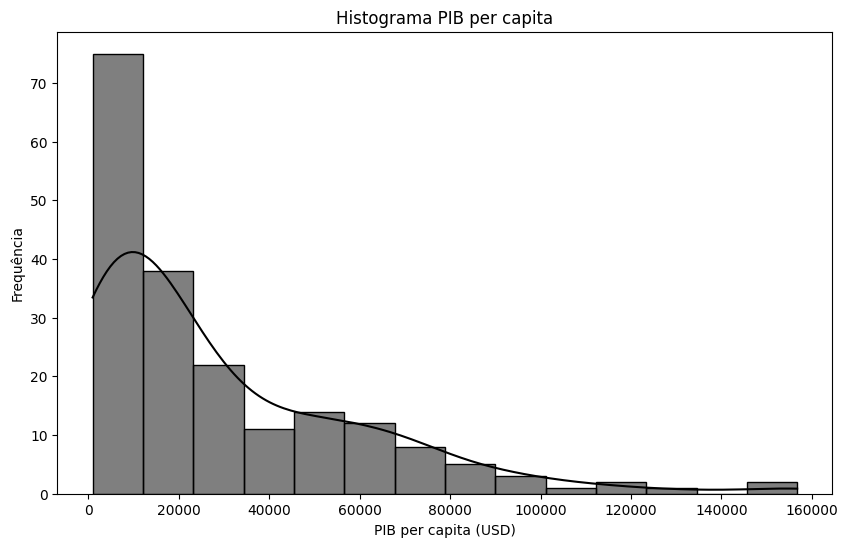

In [ ]:
# Histograma com matplotlib e Seaborn

plt.figure(figsize=(10, 6))
sns.histplot(df['PIB_per_capita'], bins=14, kde=True, color="Black")
plt.title('Histograma PIB per capita')
plt.xlabel('PIB per capita (USD)')
plt.ylabel('Frequência')
plt.show()

A correlação entre PIB per capita e IDH é: 0.76


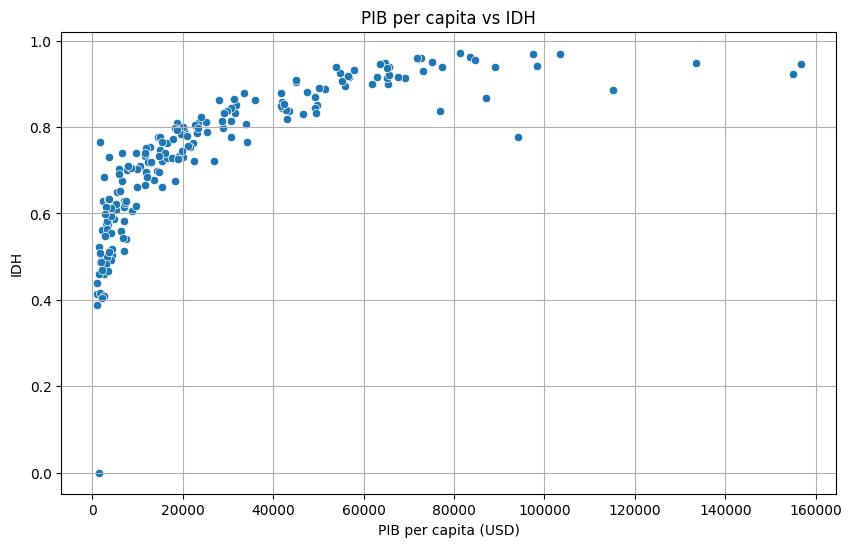

In [ ]:
# Dispersão entre PIB per capita e IDH

correlation = df['PIB_per_capita'].corr(df['IDH'])

print(f"A correlação entre PIB per capita e IDH é: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PIB_per_capita', y='IDH', data=df)
plt.title('PIB per capita vs IDH')
plt.xlabel('PIB per capita (USD)')
plt.ylabel('IDH')
plt.grid()

A correlação entre área e população é: 0.76


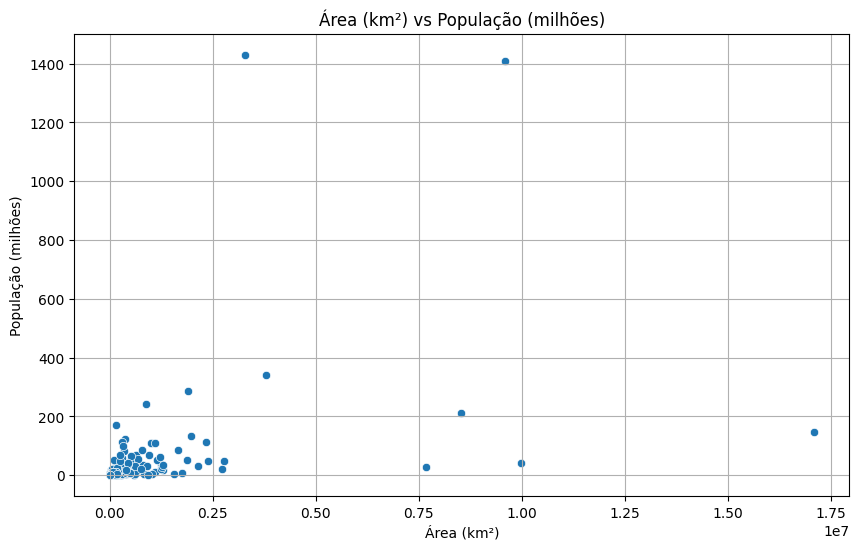

In [ ]:
# Scatter entre área e população
correlation2 = df['Área_km2'].corr(df['População(milhões)'])

print(f"A correlação entre área e população é: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Área_km2', y='População(milhões)', data=df)
plt.title('Área (km²) vs População (milhões)')
plt.xlabel('Área (km²)')
plt.ylabel('População (milhões)')
plt.grid()
plt.show()

             País  População(milhões)  PIB_Total_Nominal(Bilhões)  \
117       Namibia                3.02                       12.65   
159  South Africa               63.02                      418.05   

     PIB_per_capita  IDH  Desigualdade     Área_km2  Densidade  
117       11,603.00 0.67         59.10   825,615.00       3.66  
159       16,010.00 0.74         63.00 1,221,037.00      51.61  


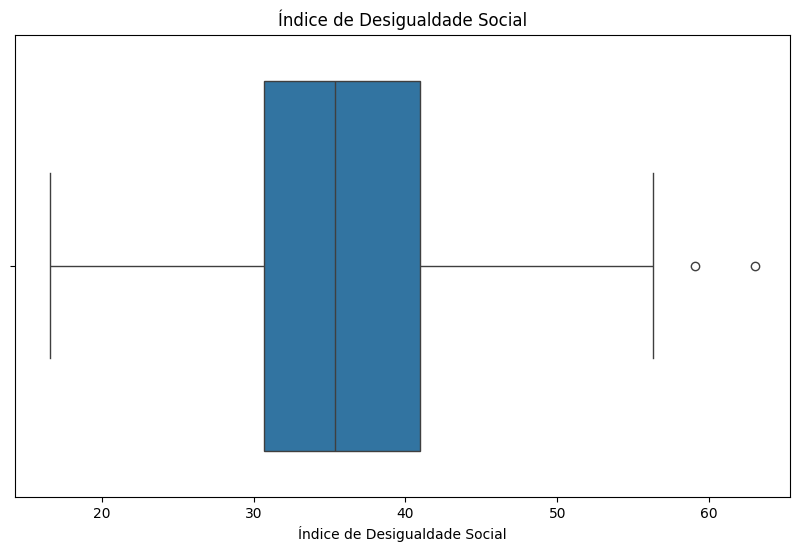

In [ ]:
# Boxplot do índice de desigualdade social

plt.figure(figsize=(10, 6))
sns.boxplot(x='Desigualdade', data=df)
plt.title('Índice de Desigualdade Social')
plt.xlabel('Índice de Desigualdade Social')


# Descobrindo quais os outliers com base no IQR
Q1 = df['Desigualdade'].quantile(0.25)
Q3 = df['Desigualdade'].quantile(0.75)
iqr = Q3 - Q1
outliers = df[(df['Desigualdade'] < Q1 - 1.5 * iqr) | (df['Desigualdade'] > Q3 + 1.5 * iqr)]


print(outliers)

plt.show()

In [ ]:
# Gráficos interativos(top10)

cols_to_plot_plotly = ['População(milhões)', 'PIB_Total_Nominal(Bilhões)', 'PIB_per_capita', 'IDH', 'Desigualdade', 'Área_km2', 'Densidade']

for col in cols_to_plot_plotly:
    if col != 'País':
        # Ordenar por cada coluna e pegar o top 10
        df_top10_plotly = df.sort_values(by=col, ascending=False).head(10)

        fig = px.bar(df_top10_plotly,
                     x='País',
                     y=col,
                     title=f'Top 10 Países por {col}')
        fig.show()


💡 Conclusão e Insights

1. Objetivo do Projeto:
Gerar insights (informações relevantes) sobre a economia e o desenvolvimento humano dos países, com o objetivo de compreender a desigualdade social e os padrões mundiais.

2. Principais Resultados:
Foi possível observar que existem poucos países com alto PIB per capita e muitos com baixo PIB per capita.
O PIB per capita elevado está diretamente relacionado a altos índices de IDH.
Nem sempre países com grande área territorial possuem uma vasta população.
A mediana da desigualdade social se apresentou como moderada.
3. Interpretação:
As análises nos remetem à compreensão de como a riqueza é concentrada, chegando à conclusão de que há uma ausência de distribuição de renda igualitária. Os dados mostram que, em países onde a qualidade de vida é elevada, a população apresenta alto espectro econômico.

No que diz respeito à área territorial, observa-se que existem países com baixíssima densidade demográfica, apesar de possuírem um grande território. Em contrapartida, há países com território limitado, mas com uma enorme quantidade de pessoas vivendo em um pequeno espaço — o que envolve fatores climáticos, econômicos e políticos.

Concluímos com a desigualdade social, que apresentou valores que indicam uma desigualdade moderada no mundo como um todo. No entanto, isso apenas reforça como a média e a mediana podem ocultar os extremos. Por exemplo, se um país possui baixa desigualdade social e outro apresenta um nível muito alto, a mediana pode apontar para uma condição moderada, escondendo os extremos da realidade.

Outro fator relevante é que o Índice de Gini mede a desigualdade dentro da população de um país, mas não considera as desigualdades entre diferentes regiões internas.

4. Limitações dos Dados:
É necessário destacar que:

Os dados são separados por países, dificultando a análise de desigualdades regionais internas.
Como se tratam de dados de um único ano, não é possível observar mudanças ao longo do tempo.


O índice de desigualdade social utilizado não abrange desigualdades em outros setores, como acesso à educação, saúde ou infraestrutura.

________________________________________________________________________________


Evidenciamos como o mundo segue com questões sociais e econômicas distintas e desiguais, sendo essas pautas centrais quando se trata de desenvolvimento econômico.

